In [20]:
import pickle, os
import numpy as np
from numpy.linalg import matrix_power

root_path = '/Users/jiahang/Documents/dagma/src/dagma/'

import sys
sys.path.append('/Users/jiahang/Documents/dagma/src/dagma/')

import matplotlib.pyplot as plt
import utils_dagma
import utils
import scipy
import seaborn as sns

In [172]:
with open(os.path.join(root_path, 'simulated_data/v17/v40/W/W_2_0.pkl'), 'rb') as f:
    W_17 = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v17/v40/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
n_nodes = 40
W_17 = W_17['W_est']
W_true = X['W_true']
B_true = (W_true != 0)

with open(os.path.join(root_path, 'simulated_data/v11/v40/W/W_2_0.pkl'), 'rb') as f:
    W_11 = pickle.load(f)
W_11 = W_11['W_est']

W_11_kno = W_11[n_nodes:, :n_nodes]
W_17_kno = W_17[n_nodes:, :n_nodes]
W_11_ori = W_11[:n_nodes, :n_nodes]
W_17_ori = W_17[:n_nodes, :n_nodes]

v11 null edges original, v11 null edges knockoff, v17 null edges original, v17 null edges knockoff


<Axes: >

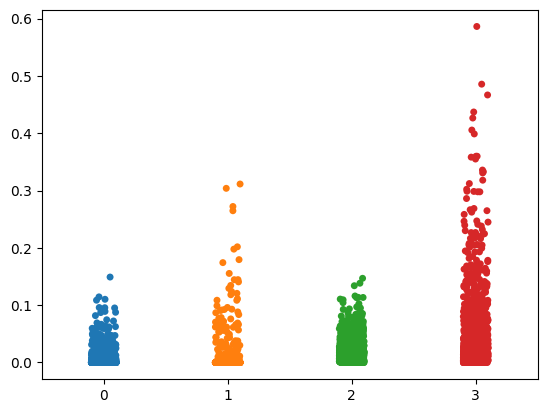

In [173]:
print("v11 null edges original, v11 null edges knockoff, v17 null edges original, v17 null edges knockoff")
sns.stripplot([
    np.abs(W_11_ori[~B_true]), 
    np.abs(W_11_kno[~B_true]), 
    np.abs(W_17_ori[~B_true]), 
    np.abs(W_17_kno[~B_true])])

v11 null edges original, v11 null edges knockoff, v17 null edges original, v17 null edges knockoff


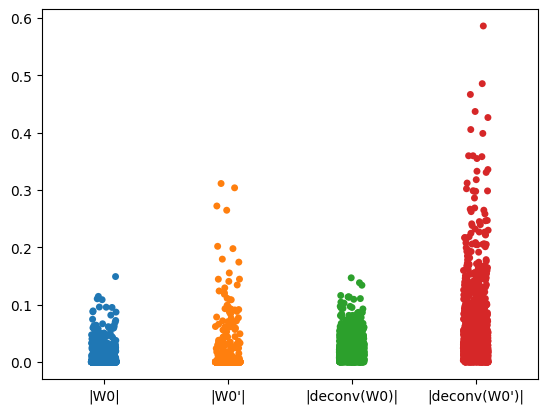

In [223]:
print("v11 null edges original, v11 null edges knockoff, v17 null edges original, v17 null edges knockoff")
ax = sns.stripplot([
    np.abs(W_11_ori[~B_true]), 
    np.abs(W_11_kno[~B_true]), 
    np.abs(W_17_ori[~B_true]), 
    np.abs(W_17_kno[~B_true])])

ax.set_xticks([0, 1, 2, 3], ["|W0|", "|W0'|", "|deconv(W0)|", "|deconv(W0')|"])
plt.show()

v11 null edges original, v11 null edges knockoff, v17 null edges original, v17 null edges knockoff


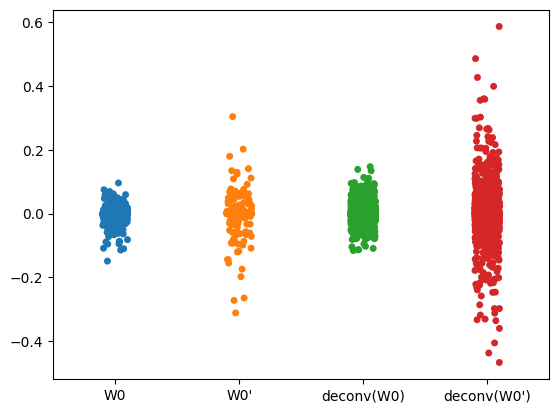

In [225]:
print("v11 null edges original, v11 null edges knockoff, v17 null edges original, v17 null edges knockoff")
ax = sns.stripplot([
    W_11_ori[~B_true], 
    W_11_kno[~B_true], 
    W_17_ori[~B_true], 
    W_17_kno[~B_true]])
ax.set_xticks([0, 1, 2, 3], ["W0", "W0'", "deconv(W0)", "deconv(W0')"])
plt.show()

In [187]:
eigval = np.abs(np.linalg.eigvals(W_17)).max()
W_17_norm = W_17 / (eigval + 1e-8)

eigval = np.abs(np.linalg.eigvals(W_11)).max()
W_11_norm = W_11 / (eigval + 1e-8)

W_17_norm_kno = W_17_norm[n_nodes:, :n_nodes]
W_17_norm_ori = W_17_norm[:n_nodes, :n_nodes]
W_11_norm_kno = W_11_norm[n_nodes:, :n_nodes]
W_11_norm_ori = W_11_norm[:n_nodes, :n_nodes]

v11 null edges original norm, v11 null edges knockoff norm, v17 null edges original norm, v17 null edges knockoff norm


<Axes: >

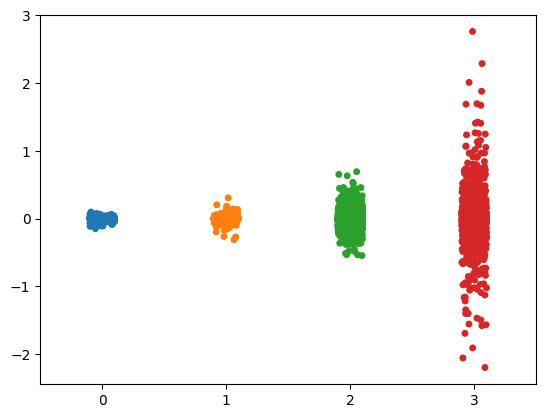

In [191]:
print("v11 null edges original norm, v11 null edges knockoff norm, v17 null edges original norm, v17 null edges knockoff norm")
sns.stripplot([
    W_11_norm_ori[~B_true], 
    W_11_norm_kno[~B_true], 
    W_17_norm_ori[~B_true], 
    W_17_norm_kno[~B_true]])

# no norm

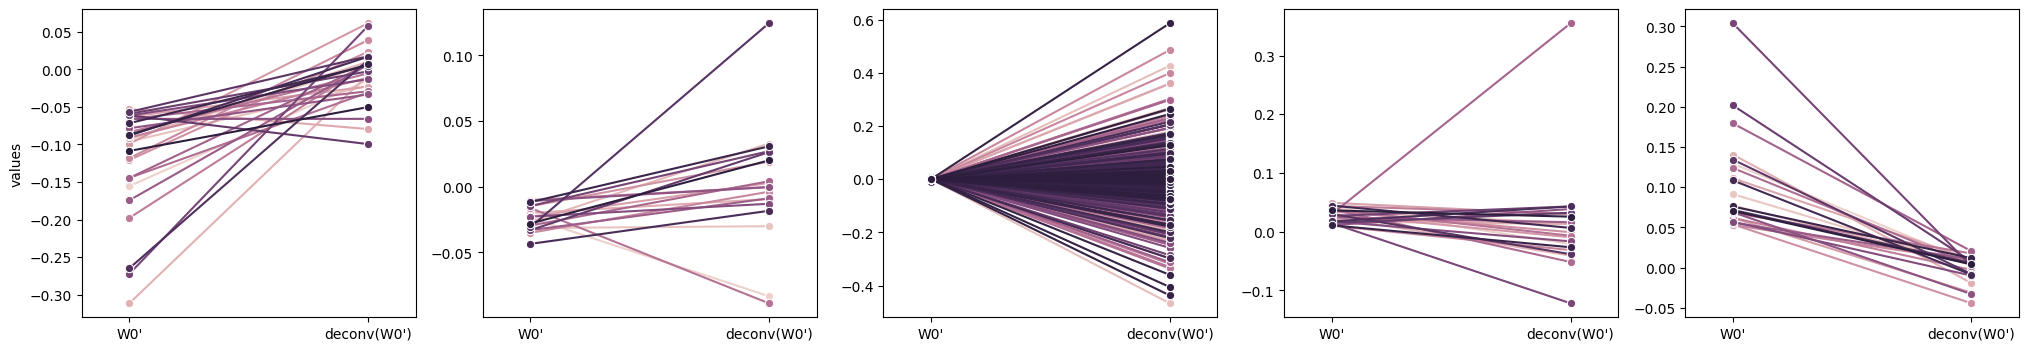

In [234]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 5, figsize=(25, 4))

def show_plot(mask, ax, disable_y_label=False):
    data = {
        "null_edge_kno": np.concatenate([W_11_kno[~B_true][mask], W_17_kno[~B_true][mask]]),
        "x": [0] * W_11_kno[~B_true][mask].shape[0] + [1] * W_11_kno[~B_true][mask].shape[0],
        "hue": list(range(W_11_kno[~B_true][mask].shape[0])) + list(range(W_11_kno[~B_true][mask].shape[0]))
    }
    df = pd.DataFrame(data)
    ax = sns.lineplot(x='x', y='null_edge_kno', data=df, hue='hue', marker='o',
                  legend=False, ax=ax)
    ax.set_xticks([0, 1], ["W0'", "deconv(W0')"])
    ax.set_xlim(-0.2, 1.2)
    if not disable_y_label:
        ax.set_ylabel("values")
    else:
        ax.set_ylabel("")
    ax.set_xlabel("")
    return ax

mask = (W_11_kno[~B_true] < -0.05)
axs[0] = show_plot(mask, axs[0])
mask = (W_11_kno[~B_true] >= -0.05) & (W_11_kno[~B_true] <= -0.01)
axs[1] = show_plot(mask, axs[1], disable_y_label=True)
mask = (W_11_kno[~B_true] >= -0.01) & (W_11_kno[~B_true] <= 0.01)
axs[2] = show_plot(mask, axs[2], disable_y_label=True)
mask = (W_11_kno[~B_true] >= 0.01) & (W_11_kno[~B_true] <= 0.05)
axs[3] = show_plot(mask, axs[3], disable_y_label=True)
mask = (W_11_kno[~B_true] >= 0.05)
axs[4] = show_plot(mask, axs[4], disable_y_label=True)

plt.show()

In [227]:
mask = (W_11_kno[~B_true] < -0.05)
data = {
    "null_edge_kno": np.concatenate([W_11_kno[~B_true][mask], W_17_kno[~B_true][mask]]),
    "x": [0] * W_11_kno[~B_true][mask].shape[0] + [1] * W_11_kno[~B_true][mask].shape[0],
    "hue": list(range(W_11_kno[~B_true][mask].shape[0])) + list(range(W_11_kno[~B_true][mask].shape[0]))
}
df = pd.DataFrame(data)

axs[0] = sns.lineplot(x='x', y='null_edge_kno', data=df, hue='hue', marker='o',
                  legend=False, ax=axs[0])
ax.set_xticks([0, 1], ['null_edge_kno_v11', 'null_edge_kno_v17'])
ax.set_xlim(-0.2, 1.2)

(-0.2, 1.2)

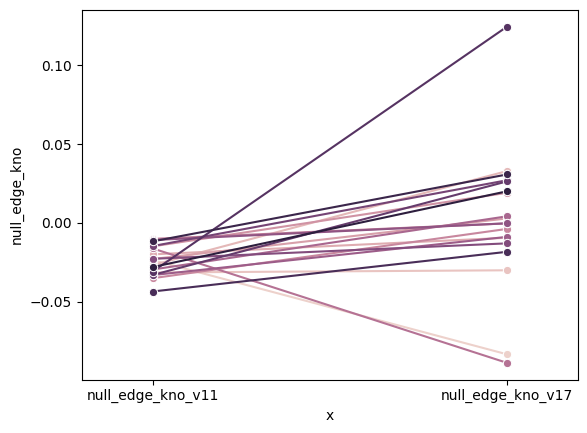

In [196]:
mask = (W_11_kno[~B_true] >= -0.05) & (W_11_kno[~B_true] <= -0.01)
data = {
    "null_edge_kno": np.concatenate([W_11_kno[~B_true][mask], W_17_kno[~B_true][mask]]),
    "x": [0] * W_11_kno[~B_true][mask].shape[0] + [1] * W_11_kno[~B_true][mask].shape[0],
    "hue": list(range(W_11_kno[~B_true][mask].shape[0])) + list(range(W_11_kno[~B_true][mask].shape[0]))
}
df = pd.DataFrame(data)

ax = sns.lineplot(x='x', y='null_edge_kno', data=df, hue='hue', marker='o',
                  legend=False, ax=axs[1])
ax.set_xticks([0, 1], ['null_edge_kno_v11', 'null_edge_kno_v17'])
ax.set_xlim(-0.2, 1.2)
plt.show()

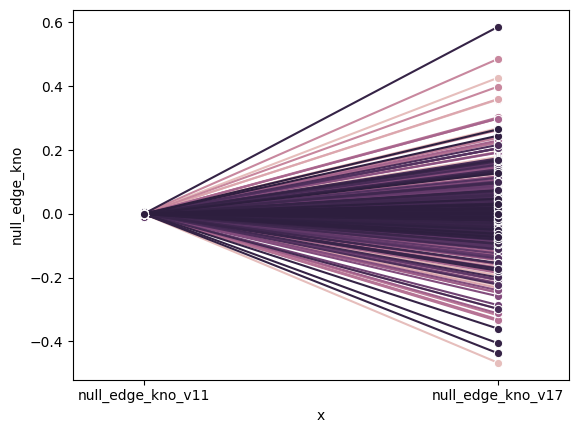

In [177]:
mask = (W_11_kno[~B_true] >= -0.01) & (W_11_kno[~B_true] <= 0.01)
data = {
    "null_edge_kno": np.concatenate([W_11_kno[~B_true][mask], W_17_kno[~B_true][mask]]),
    "x": [0] * W_11_kno[~B_true][mask].shape[0] + [1] * W_11_kno[~B_true][mask].shape[0],
    "hue": list(range(W_11_kno[~B_true][mask].shape[0])) + list(range(W_11_kno[~B_true][mask].shape[0]))
}
df = pd.DataFrame(data)

ax = sns.lineplot(x='x', y='null_edge_kno', data=df, hue='hue', marker='o',
                  legend=False)
ax.set_xticks([0, 1], ['null_edge_kno_v11', 'null_edge_kno_v17'])
ax.set_xlim(-0.2, 1.2)
plt.show()

In [208]:
0.01 / 0.2

0.049999999999999996

In [210]:
0.99 / 0.2

4.949999999999999

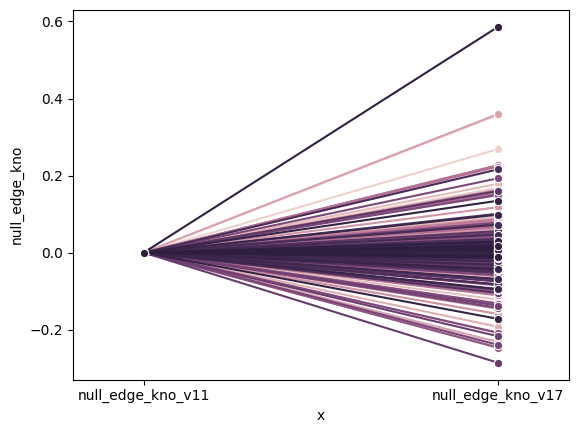

In [206]:
mask = (W_11_kno[~B_true] >= -1e-4) & (W_11_kno[~B_true] <= -1e-5)
data = {
    "null_edge_kno": np.concatenate([W_11_kno[~B_true][mask], W_17_kno[~B_true][mask]]),
    "x": [0] * W_11_kno[~B_true][mask].shape[0] + [1] * W_11_kno[~B_true][mask].shape[0],
    "hue": list(range(W_11_kno[~B_true][mask].shape[0])) + list(range(W_11_kno[~B_true][mask].shape[0]))
}
df = pd.DataFrame(data)

ax = sns.lineplot(x='x', y='null_edge_kno', data=df, hue='hue', marker='o',
                  legend=False)
ax.set_xticks([0, 1], ['null_edge_kno_v11', 'null_edge_kno_v17'])
ax.set_xlim(-0.2, 1.2)
plt.show()

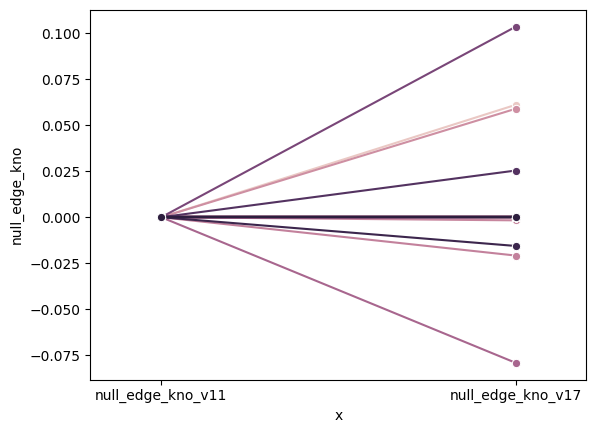

In [199]:
mask = (W_11_kno[~B_true] >= -1e-7) & (W_11_kno[~B_true] <= 1e-7)
data = {
    "null_edge_kno": np.concatenate([W_11_kno[~B_true][mask], W_17_kno[~B_true][mask]]),
    "x": [0] * W_11_kno[~B_true][mask].shape[0] + [1] * W_11_kno[~B_true][mask].shape[0],
    "hue": list(range(W_11_kno[~B_true][mask].shape[0])) + list(range(W_11_kno[~B_true][mask].shape[0]))
}
df = pd.DataFrame(data)

ax = sns.lineplot(x='x', y='null_edge_kno', data=df, hue='hue', marker='o',
                  legend=False)
ax.set_xticks([0, 1], ['null_edge_kno_v11', 'null_edge_kno_v17'])
ax.set_xlim(-0.2, 1.2)
plt.show()

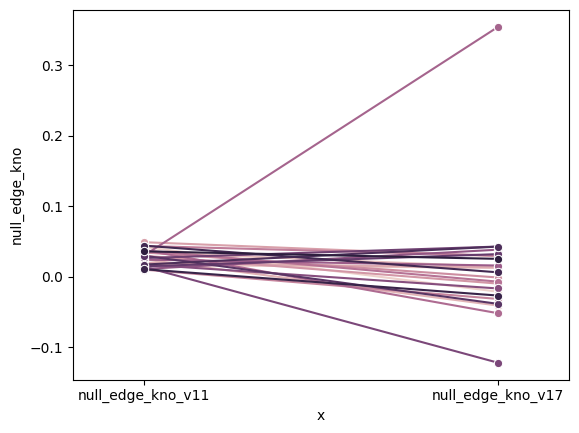

In [178]:
mask = (W_11_kno[~B_true] >= 0.01) & (W_11_kno[~B_true] <= 0.05)
data = {
    "null_edge_kno": np.concatenate([W_11_kno[~B_true][mask], W_17_kno[~B_true][mask]]),
    "x": [0] * W_11_kno[~B_true][mask].shape[0] + [1] * W_11_kno[~B_true][mask].shape[0],
    "hue": list(range(W_11_kno[~B_true][mask].shape[0])) + list(range(W_11_kno[~B_true][mask].shape[0]))
}
df = pd.DataFrame(data)

ax = sns.lineplot(x='x', y='null_edge_kno', data=df, hue='hue', marker='o',
                  legend=False)
ax.set_xticks([0, 1], ['null_edge_kno_v11', 'null_edge_kno_v17'])
ax.set_xlim(-0.2, 1.2)
plt.show()

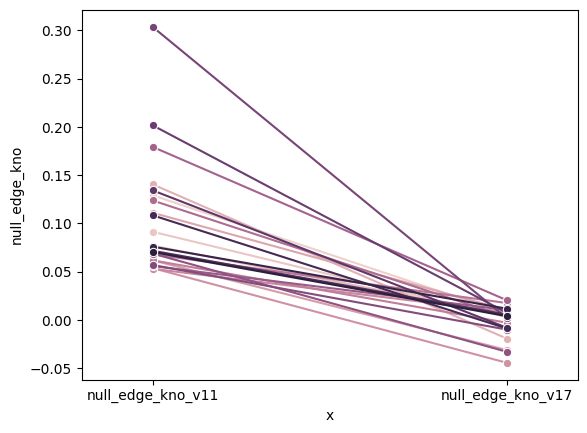

In [179]:
mask = (W_11_kno[~B_true] >= 0.05)
data = {
    "null_edge_kno": np.concatenate([W_11_kno[~B_true][mask], W_17_kno[~B_true][mask]]),
    "x": [0] * W_11_kno[~B_true][mask].shape[0] + [1] * W_11_kno[~B_true][mask].shape[0],
    "hue": list(range(W_11_kno[~B_true][mask].shape[0])) + list(range(W_11_kno[~B_true][mask].shape[0]))
}
df = pd.DataFrame(data)

ax = sns.lineplot(x='x', y='null_edge_kno', data=df, hue='hue', marker='o',
                  legend=False)
ax.set_xticks([0, 1], ['null_edge_kno_v11', 'null_edge_kno_v17'])
ax.set_xlim(-0.2, 1.2)
plt.show()

v11 true edges original, v11 true edges knockoff, v17 true edges original, v17 true edges knockoff


<Axes: >

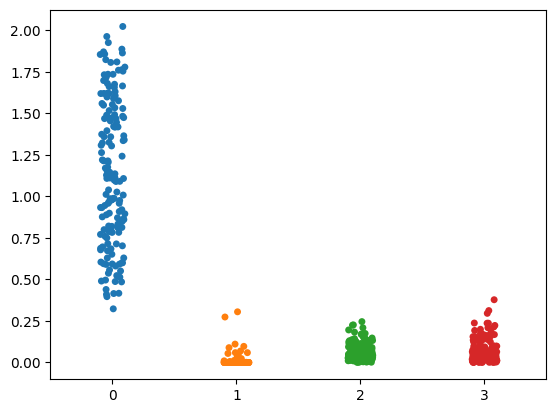

In [32]:
print("v11 true edges original, v11 true edges knockoff, v17 true edges original, v17 true edges knockoff")
sns.stripplot([
    np.abs(W_11_kno[B_true]), 
    np.abs(W_11[n_nodes:, :n_nodes][B_true]), 
    np.abs(W_17[:n_nodes, :n_nodes][B_true]), 
    np.abs(W_17[n_nodes:, :n_nodes][B_true])])

# which null edges have increased knockoff?

In [132]:
W_11_ori = W_11_kno
W_17_ori = W_17[:n_nodes, :n_nodes]
W_11_knock = W_11[n_nodes:, :n_nodes]
W_17_knock = W_17[n_nodes:, :n_nodes]

"""
Notes

there are 53 null edges have increased knockoff at least 0.2
* (np.abs(W_17_knock[~B_true]) > (np.abs(W_11_knock[~B_true]) + 0.2)).sum()
"""

'\nNotes\n\nthere are 53 null edges have increased knockoff at least 0.2\n* (np.abs(W_17_knock[~B_true]) > (np.abs(W_11_knock[~B_true]) + 0.2)).sum()\n'

# how increased null edges distributed in original distributions and increased distribution?
* these edges are low valued in original distribution, but high in the increased distribution.
* that means, those low valued edges are increased the most.

In [133]:
mask = (np.abs(W_17_knock[~B_true]) > (np.abs(W_11_knock[~B_true]) + 0.2))

In [111]:
np.abs(W_11_knock[~B_true])[mask].min()

2.923675056199119e-07

In [58]:
np.abs(W_11_knock[~B_true])[mask].max()

0.030135518346779556

In [56]:
np.abs(W_17_knock[~B_true])[mask].min()

0.20103368021000578

In [54]:
np.abs(W_17_knock[~B_true])[mask].max()

0.5862328916887983

In [55]:
W_17_knock[~B_true].max()

0.5862328916887983

# how about null edge knock high valued edges?
* in contrast, those original high valued edges have reduced valued in the new distribution.

In [112]:
(np.abs(W_11_knock[~B_true]) > 0.1).sum()

20

In [113]:
mask = (np.abs(W_11_knock[~B_true]) > 0.1)
np.abs(W_17_knock[~B_true])[mask].max()

0.05772175349152036

# does null edges original change?

In [85]:
(np.abs(W_11_ori[~B_true]) > 0.07).sum()
mask = (np.abs(W_11_ori[~B_true]) > 0.07)

In [86]:
np.abs(W_17_ori[~B_true])[mask].min()

0.0017900772122103005

In [87]:
np.abs(W_17_ori[~B_true])[mask].max()

0.07165083648390451

In [88]:
np.abs(W_11_ori[~B_true])[mask].min()

0.07239637656007532

In [89]:
np.abs(W_11_ori[~B_true])[mask].max()

0.1490380701827072

In [101]:
(np.abs(W_11_ori[~B_true]) < 1e-7).sum()

47

In [102]:
mask = (np.abs(W_11_ori[~B_true]) < 1e-7)

In [103]:
np.abs(W_17_ori[~B_true])[mask].min()

0.0

In [104]:
np.abs(W_17_ori[~B_true])[mask].max()

0.05492058457572336

In [105]:
np.abs(W_11_ori[~B_true])[mask].min()

0.0

In [106]:
np.abs(W_11_ori[~B_true])[mask].max()

9.6585883614073e-08

# which null edge original go up?

In [107]:
(np.abs(W_17_ori[~B_true]) > 0.07).sum()


41

In [108]:
mask = (np.abs(W_17_ori[~B_true]) > 0.07)

In [109]:
np.abs(W_11_ori[~B_true])[mask].max()

0.09586647782686715

In [110]:
np.abs(W_11_ori[~B_true])[mask].min()

2.570926213605549e-07

# MISC

## null edge knockoff matrix spectrum

In [116]:
W_11_knock_only_null = W_11_knock.copy()

In [117]:
W_11_knock_only_null[B_true] = 0.

In [118]:
W_11_knock_only_null_sym = (W_11_knock_only_null + W_11_knock_only_null.T) / 2

In [125]:
np.sort(np.linalg.eigvals(np.abs(W_11_knock_only_null_sym)))

array([-2.21491828e-01, -2.00612276e-01, -1.61636935e-01, -1.42030860e-01,
       -1.21588001e-01, -1.04829704e-01, -1.00323002e-01, -8.57144074e-02,
       -6.65225324e-02, -6.26879645e-02, -4.48901833e-02, -3.31842570e-02,
       -2.43498465e-02, -1.93312532e-02, -1.55655129e-02, -1.30654822e-02,
       -7.20579292e-03, -4.04132889e-03, -2.18961092e-03, -8.40019591e-04,
        4.01039005e-05,  5.67730209e-04,  2.63798187e-03,  5.16190839e-03,
        6.16771546e-03,  1.42336074e-02,  1.85829832e-02,  2.66749702e-02,
        2.96448669e-02,  3.14811111e-02,  4.42600897e-02,  8.01520359e-02,
        9.16799620e-02,  1.00211450e-01,  1.05478969e-01,  1.24990675e-01,
        1.44307585e-01,  1.62029826e-01,  1.91825082e-01,  2.51972145e-01])

In [126]:
W_17_knock_only_null = W_17_knock.copy()
W_17_knock_only_null[B_true] = 0.
W_17_knock_only_null_sym = (W_17_knock_only_null + W_17_knock_only_null.T) / 2
np.sort(np.linalg.eigvals(np.abs(W_17_knock_only_null_sym)))

array([-0.60988766, -0.45457822, -0.42439152, -0.35759803, -0.29186052,
       -0.2802626 , -0.27364336, -0.23616182, -0.16941834, -0.1438051 ,
       -0.1281578 , -0.11563982, -0.09393426, -0.08109998, -0.07892961,
       -0.0627318 , -0.04768793, -0.0467795 , -0.03757011, -0.02144331,
       -0.00615168, -0.00284736,  0.00838373,  0.01206162,  0.02628316,
        0.03325477,  0.0405077 ,  0.05322779,  0.06138774,  0.07377299,
        0.09781442,  0.11831827,  0.13409269,  0.16362434,  0.18176026,
        0.2250239 ,  0.30794189,  0.40513009,  0.43123562,  1.59075934])

In [127]:
np.sort(np.linalg.eigvals(np.abs(W_17_knock_only_null_sym))) - np.sort(np.linalg.eigvals(np.abs(W_11_knock_only_null_sym)))

array([-0.38839583, -0.25396594, -0.26275459, -0.21556717, -0.17027251,
       -0.1754329 , -0.17332036, -0.15044741, -0.10289581, -0.08111714,
       -0.08326761, -0.08245556, -0.06958441, -0.06176873, -0.06336409,
       -0.04966632, -0.04048214, -0.04273817, -0.0353805 , -0.02060329,
       -0.00619178, -0.00341509,  0.00574575,  0.00689971,  0.02011545,
        0.01902116,  0.02192472,  0.02655282,  0.03174287,  0.04229187,
        0.05355433,  0.03816624,  0.04241273,  0.06341289,  0.07628129,
        0.10003323,  0.16363431,  0.24310027,  0.23941054,  1.33878719])

In [130]:
np.abs((np.sort(np.linalg.eigvals(np.abs(W_17_knock_only_null_sym)))) - np.abs(np.sort(np.linalg.eigvals(np.abs(W_11_knock_only_null_sym))) > 0.))

array([0.60988766, 0.45457822, 0.42439152, 0.35759803, 0.29186052,
       0.2802626 , 0.27364336, 0.23616182, 0.16941834, 0.1438051 ,
       0.1281578 , 0.11563982, 0.09393426, 0.08109998, 0.07892961,
       0.0627318 , 0.04768793, 0.0467795 , 0.03757011, 0.02144331,
       1.00615168, 1.00284736, 0.99161627, 0.98793838, 0.97371684,
       0.96674523, 0.9594923 , 0.94677221, 0.93861226, 0.92622701,
       0.90218558, 0.88168173, 0.86590731, 0.83637566, 0.81823974,
       0.7749761 , 0.69205811, 0.59486991, 0.56876438, 0.59075934])

In [25]:
import deconv
from importlib import reload
reload(deconv)

W_11_post_deconv = deconv.net_deconv(W_11, {
    'device': 'cpu',
    'epochs': 30000,
    'lr': 1e-2,
    'l2_w': 0.,
    'dag_control_deconv': None,
    'order': 5,
    'd': 40, 
    'clean_diag': False
    
})

Epoch 0 | Loss 0.045888
Epoch 200 | Loss 0.000722
Epoch 400 | Loss 0.000400
Epoch 600 | Loss 0.000268
Epoch 800 | Loss 0.000388
Epoch 1000 | Loss 0.000251
Epoch 1200 | Loss 0.000170
Epoch 1400 | Loss 0.000163
Epoch 1600 | Loss 0.000157
Epoch 1800 | Loss 0.000151
Epoch 2000 | Loss 0.000145
Epoch 2200 | Loss 0.000139
Epoch 2400 | Loss 0.000133
Epoch 2600 | Loss 0.000127
Epoch 2800 | Loss 0.000121
Epoch 3000 | Loss 0.000116
Epoch 3200 | Loss 0.000110
Epoch 3400 | Loss 0.000104
Epoch 3600 | Loss 0.000099
Epoch 3800 | Loss 0.000109
Epoch 4000 | Loss 0.000090
Epoch 4200 | Loss 0.000088
Epoch 4400 | Loss 0.000083
Epoch 4600 | Loss 0.000079
Epoch 4800 | Loss 0.000095
Epoch 5000 | Loss 0.000074
Epoch 5200 | Loss 0.000072
Epoch 5400 | Loss 0.000078
Epoch 5600 | Loss 0.000067
Epoch 5800 | Loss 0.000066
Epoch 6000 | Loss 0.000075
Epoch 6200 | Loss 0.000062
Epoch 6400 | Loss 0.000062
Epoch 6600 | Loss 0.000060
Epoch 6800 | Loss 0.000058
Epoch 7000 | Loss 0.000057
Epoch 7200 | Loss 0.000069
Epoch 74

v11 null edges original, v11 null edges knockoff, v11_post deconv nuill edges original, v11_post deconv nuill edges knockoff, v17 null edges original, v17 null edges knockoff


<Axes: >

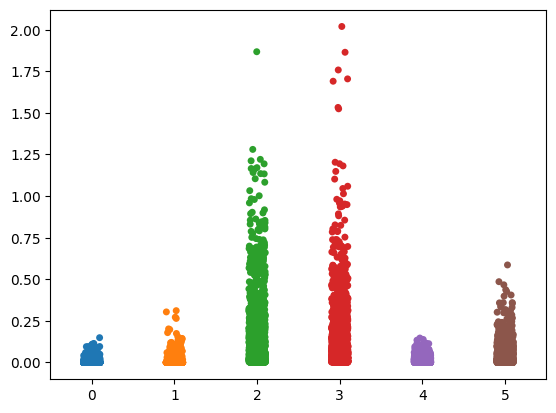

In [28]:
print("v11 null edges original, v11 null edges knockoff, v11_post deconv nuill edges original, v11_post deconv nuill edges knockoff, v17 null edges original, v17 null edges knockoff")
sns.stripplot([
    np.abs(W_11_kno[~B_true]), 
    np.abs(W_11[n_nodes:, :n_nodes][~B_true]), 
    np.abs(W_11_post_deconv[:n_nodes, :n_nodes][~B_true]), 
    np.abs(W_11_post_deconv[n_nodes:, :n_nodes][~B_true]), 
    np.abs(W_17[:n_nodes, :n_nodes][~B_true]), 
    np.abs(W_17[n_nodes:, :n_nodes][~B_true])])

v11 null edges original, v11 null edges knockoff, v11_post deconv nuill edges original, v11_post deconv nuill edges knockoff, v17 null edges original, v17 null edges knockoff


<Axes: >

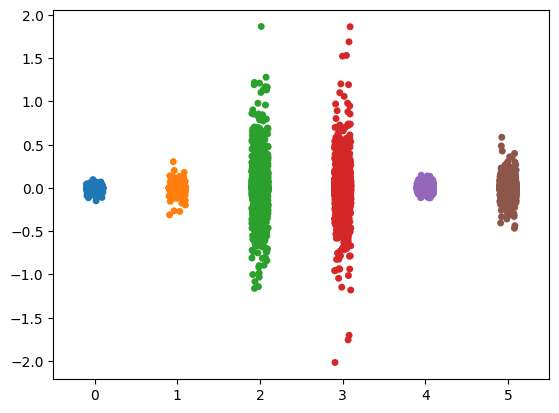

In [29]:
print("v11 null edges original, v11 null edges knockoff, v11_post deconv nuill edges original, v11_post deconv nuill edges knockoff, v17 null edges original, v17 null edges knockoff")
sns.stripplot([
    W_11_kno[~B_true], 
    W_11[n_nodes:, :n_nodes][~B_true], 
    W_11_post_deconv[:n_nodes, :n_nodes][~B_true], 
    W_11_post_deconv[n_nodes:, :n_nodes][~B_true], 
    W_17[:n_nodes, :n_nodes][~B_true], 
    W_17[n_nodes:, :n_nodes][~B_true]])